### Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Lendo dataset
df = pd.read_csv("../dataset/Mall_Customers.csv", index_col="CustomerID")

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


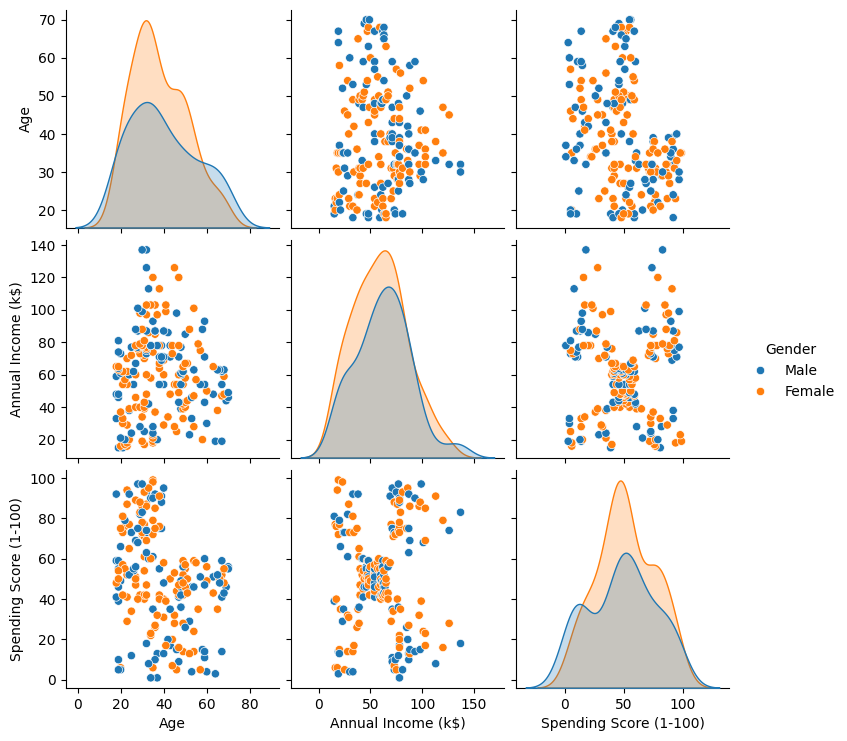

In [4]:
#Plotando Scatterplot dos dados evidenciando a categorias de "Gender"
sns.pairplot(data=df, hue="Gender")

Como pode ser visto em todos os scatterplots, todos não há uma diferença aparente entre sexos com respeito às variáveis selecionadas, dado que os pontos das duas cores representando os gêneros masculino e feminino aparecem misturadas. No entanto, nos gráficos a partir das variáveis, Annual Income (k$) e Spending Score (1-100), vemos o que podem ser clusters, pelo acúmulo de pontos em regiões específicas separadas umas das outras. Isso pode nos ajudar a segmentar os consumidores quanto ao ganho anual e a pontuação de relacionada ao consumo.

In [5]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Criando modelo de clusterização

In [6]:
#Separando colunas 'Annual Income' e 'Spending Score' para aplicar o método de clusterização K-means
X = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
#Importando K-means
from sklearn.cluster import KMeans

#Criando modelo de clusterização
kmeans = KMeans(random_state=0).fit(X)

#### Modelo sem definição de número de cluster

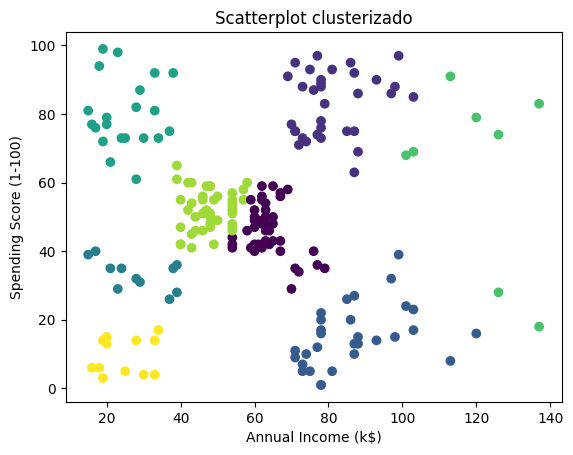

In [8]:
#Visualizando clusterização
fig, ax = plt.subplots()

ax.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=kmeans.labels_)

#Adicionando rótulos aos eixos e título
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.title("Scatterplot clusterizado")

plt.show()

#### Método do Cotovelo

Para aplicar o método do cotovelo, faremos o fit dos dados para um intervalo de valores k e analisaremos a curva gerada a partir dos valores de inercia para cada número de cluster. De modo geral, o método se baseia em escolher o ponto que antecede uma queda significativa do valor de inercia observado e precede mudanças não tão significativas, o que indica que aumentar o número de clusters a partir desse valor "ideal" não representaria grande melhora da qualidade da clusterização.

In [9]:
k_clusters = []
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_clusters.append(i)
    inertias.append(kmeans.inertia_)

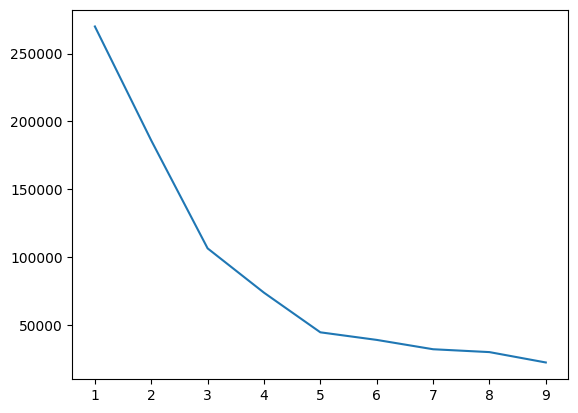

In [10]:
#Visualizando inercias para cada valor de k
fig, ax = plt.subplots()

ax.plot(k_clusters, inertias)

plt.show()

Pelo gráfico, podemos estimar que um bom valor de número de clusters (k) seria 5.

#### Modelo com número clusters ajustado

In [11]:
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X)

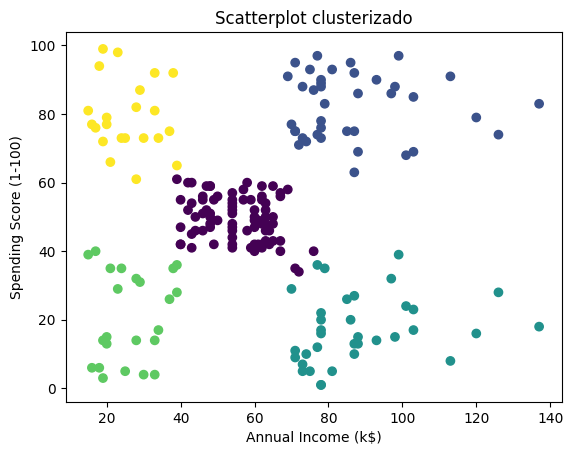

In [12]:
#Visualizando clusterização
fig, ax = plt.subplots()

ax.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=kmeans5.labels_)

#Adicionando rótulos aos eixos e título
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.title("Scatterplot clusterizado")

plt.show()

Como pode ser visto, com a escolha de 5 clusters há uma clara distinção entre regiões de grande acúmulo de pontos, as quais podem representar consumidores com caracteristicas de consumo e renda singulares.

#### Adicionando os centroides

In [13]:
#Posição dos centroides
centroids = kmeans5.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

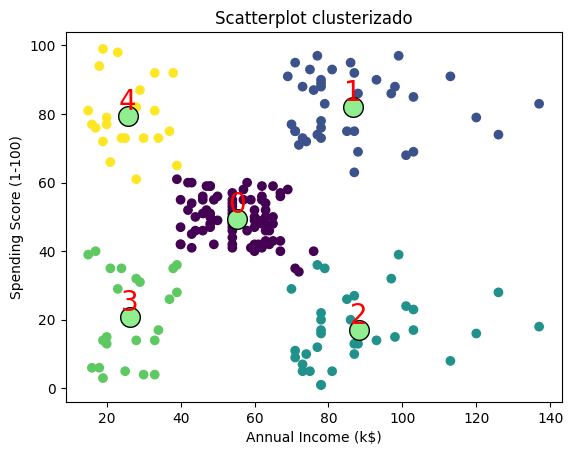

In [14]:
#Visualizando clusterização
fig, ax = plt.subplots()
ax.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=kmeans5.labels_)

#Plotando os Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='lightgreen', marker='o', edgecolor='black', label='Centroids')

# Adicionando os nomes de cada centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'{i}', fontsize=20, ha='center', va='bottom', color='red')


#Adicionando rótulos aos eixos e título
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.title("Scatterplot clusterizado")

plt.show()

In [15]:
df["Cluster"] = kmeans5.labels_

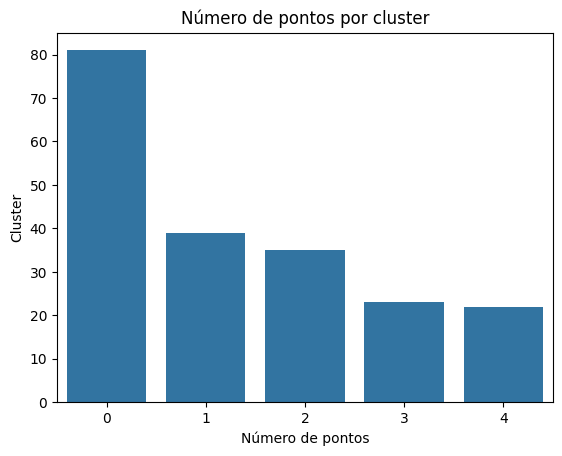

In [16]:
#Visualizando distribuição de pontos em cada cluster
fig, ax = plt.subplots()

sns.barplot(df.groupby("Cluster")["Annual Income (k$)"].count())

#Adicionando rótulos aos eixos e título
plt.ylabel("Cluster")
plt.xlabel("Número de pontos")
plt.title("Número de pontos por cluster")

plt.show()

Devido ao fato do cluster 0 (central) conter a maioria do número de pontos e ser aparentemente o mais bem definido, acredito que esse seria o cluster de consumidores ideal para priorizar nas campânhas de marketing. Ele conta com pessoas com renda anual e score de consumos moderados, mas é definitivamente o grupo mais consistente dentre os tipos de consumidores encontrados.